# Домашнее задание 5

In [13]:
%matplotlib inline
import numpy as np

**Задание 1** - Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [14]:
def rulette_turn():
    x = int(np.random.uniform(0, 36))
    if x in [2, 4, 6, 8, 10, 11, 13 ,15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35]:
        print(f'{x} Black')
    elif x in [1, 3 ,5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]:
        print(f'{x} Red')
    else:
        print('Zero')

**Задание 2.1** - Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [15]:
def coin_drop():
    x = np.random.uniform(0, 10)
    if x<5:
        return 0
    return 1

Проверка теоремы умножения вероятностей. Проведём 10000 подбрасываний попарно и будет считать количество пар, в которых за 1 следует 0. Т.к. результаты подбрасывания монеты независимы, вероятность того, что за выпадением "орла" будет "решка" $$P(AB) = P(A)P(B) = 0.5 * 0.5 = 0.25$$

In [27]:
counter = 0
for i in range(10000):
    a = coin_drop()
    b = coin_drop()
    if a > b:
        counter += 1
p = counter / 10000
print(p)

0.2499


**Задание 2.2** - Сгенерируйте десять выборок случайных чисел х0, …, х9.  
И постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [28]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [69]:
x = np.random.uniform(0, 1, (10, 1000)) # Генерируем 10 выборок 1000 случайных величин с равномерным распределением

Text(0.5, 1.0, 'Гистограмма распределения суммы')

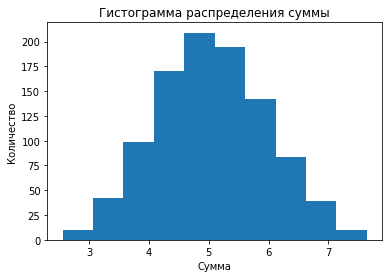

In [70]:
s = []
for i in range(1000):
    s.append(np.sum(x[:, i])) # Считаем суммы по столбцам
num_bins = 10
n, bins, patches = plt.hist(s, num_bins)
plt.xlabel('Сумма')
plt.ylabel('Количество')
plt.title('Гистограмма распределения суммы')

**Задание 3.1** - Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [71]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
#print(a, b, c, d)
#print(x)
print(k, n, k/n)

3722 10000 0.3722


Сравним результат с расчетом по формуле Бернулли:  
$$P_4(2) = C_4^2 * {1 \over 2^4} = {{4!} \over {2! * 2! * 16}} = {6 \over 16} = 0. 375$$
Результат почти совпадает.

**Задание 3.1** - Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

Посчитаем вероятность 3-х успехов в 4 испытаниях.

In [72]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 3:
        k = k + 1
#print(a, b, c, d)
#print(x)
print(k, n, k/n)

2577 10000 0.2577


По формуле Бернулли:
$$P_4(3) = {4! \over {3! \cdot 1! \cdot 16}} = 0.25$$

**Задание 4** - Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

#### Размещения

In [73]:
import itertools

In [78]:
my_list = []
for p in itertools.permutations("0123",3):
    my_list.append(p)
print(my_list)
print(f'Количество размещений: {len(my_list)}')

[('0', '1', '2'), ('0', '1', '3'), ('0', '2', '1'), ('0', '2', '3'), ('0', '3', '1'), ('0', '3', '2'), ('1', '0', '2'), ('1', '0', '3'), ('1', '2', '0'), ('1', '2', '3'), ('1', '3', '0'), ('1', '3', '2'), ('2', '0', '1'), ('2', '0', '3'), ('2', '1', '0'), ('2', '1', '3'), ('2', '3', '0'), ('2', '3', '1'), ('3', '0', '1'), ('3', '0', '2'), ('3', '1', '0'), ('3', '1', '2'), ('3', '2', '0'), ('3', '2', '1')]
Количество размещений: 24


Проверяем по формуле: $$A_4^2 = {4! \over {(4 - 3)!}} = 24$$

#### Сочетания

In [77]:
my_list = []
for p in itertools.combinations("0123",3):
    my_list.append(p)
print(my_list)
print(f'Количество сочетаний: {len(my_list)}')

[('0', '1', '2'), ('0', '1', '3'), ('0', '2', '3'), ('1', '2', '3')]
Количество сочетаний: 4


Проверяем по формуле: $$C_4^2 = {4! \over {3! \cdot (4 - 3)!}} = 4$$

**Задание 5** - Дополните код расчетом коэффициента корреляции x и y по формуле
$$R = {{\sum (x_i - x_m)(y_i - y_m)} \over {\sqrt{\sum{(x_i - x_m)^2}\sum{(y_i - y_m)^2}}}}$$

/Users/artur/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


0.71996302538846 0.13284136330776738
0.71996302538846 0.13284136330776738


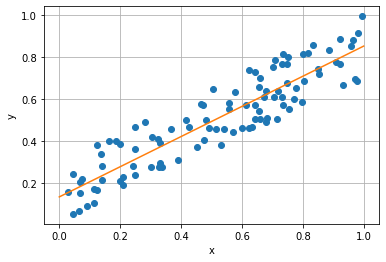

0.9092532446840383
[[1.         0.90925324]
 [0.90925324 1.        ]]


In [94]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()
xm = np.sum(x)/n
ym = np.sum(y)/n
c_c = (np.sum((x - xm) * (y - ym))) / np.sqrt(np.sum((x - xm)**2) * np.sum((y - ym)**2))
print(c_c)
c = np.corrcoef(x, y) 
print(c)